In [ ]:
NIVELL 1: Treballem els conceptes de l'estructura d'una matriu, dimensió, eixos
i la vectorització que ens permet reduir l'ús de for loops en
operacions aritmètiques o matemàtiques..

In [ ]:
- Exercici 1
Crea un np.array de una dimension, que inclogui l'almenys 8 nombres sencers, 
data type int64. Mostra la dimensió i la forma de la matriu. .


In [3]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import gc

In [13]:
a = np.array([1,3,5,6,8,9,2,1,3])
a

array([1, 3, 5, 6, 8, 9, 2, 1, 3])

In [14]:
#dimensio
a.ndim

1

In [15]:
#forma
a.shape

(9,)

In [ ]:

- Exercici 2
De la matriu de l'exercici 1, calcula el valor mitjà dels valors introduïts i 
resta la mitjana resultant de cada un dels valors de la matriu.


In [17]:
mitjana = np.mean(a) 
mitjana


4.222222222222222

In [18]:
resultat = a - mitjana
resultat

array([-3.22222222, -1.22222222,  0.77777778,  1.77777778,  3.77777778,
        4.77777778, -2.22222222, -3.22222222, -1.22222222])

In [ ]:

- Exercici 3
Crea una matriu bidimensional amb una forma de 5 x 5. Extreu el valor màxim de la matriu, 
i els valors màxims de cadascun dels seus eixos.

In [23]:
b = np.random.randint(0,100, size = (5,5))
b

array([[33, 73, 84, 97,  8],
       [11, 34, 69, 29, 93],
       [21, 57, 61, 38, 52],
       [12,  7, 45, 95, 48],
       [28,  0, 71, 27, 40]])

In [24]:
maxim_b = np.max(b)
maxim

97

In [25]:
maxim_b_x = np.max(b, axis = 0)
maxim_b_x

array([33, 73, 84, 97, 93])

In [26]:
maxim_b_y = np.max(b, axis = 1)
maxim_b_y

array([97, 93, 61, 95, 71])

In [ ]:
NIVELL 2: Treballem els conceptes de l'estructura d'una matriu, Broadcasting, indexació, Mask..

In [ ]:
- Exercici 4
Mostreu-me amb exemples de diferents matrius, la regla fonamental de Broadcasting que diu:
"les matrius es poden transmetre / broadcast entre si les seves dimensions coincideixen 
o si una de les matrius té una mida d'1".

In [29]:
#Exemple en que conicideixen les dimensions per multiplicar dues matrius: columnes(a) = files(b) i files(a) = columnes(b)
a = np.ones((2,3))
print(a)

b = np.full((3,2), 2)
print(b)

np.matmul(a, b)

[[1. 1. 1.]
 [1. 1. 1.]]
[[2 2]
 [2 2]
 [2 2]]


array([[6., 6.],
       [6., 6.]])

In [30]:
#Ara si modifiquem la forma de 'a' perquè columnes(a) != files(b) veiem com ens salta error
a = np.ones((2,4))
print(a)

b = np.full((3,2), 2)
print(b)

np.matmul(a, b)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[2 2]
 [2 2]
 [2 2]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

In [46]:
#Ara si agafem 'a' i provem de multiplicar-la per una matriu de mida 1 (però amb el mateix número de columnes),
#numpy pot operar mitjançant el broadcasting:

a = np.ones((2,4))
print(a)

b = np.array([1,2,3,4])
print(b)

np.matmul(a, b)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[1 2 3 4]


array([10., 10.])

In [52]:
#Tambe funciona amb valors escalars, els quals numpy converteix a matrius de la mida de la matriu amb la que han d'operar 
a = np.ones((2,4))
b = 2.0
a * b


array([[2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [ ]:
- Exercici 5
Utilitza la Indexació per extreure els valors d'una columna i una fila de la matriu. I suma els seus valors.

In [68]:
b = np.random.randint(0,10, size = (6,6))
b


array([[4, 2, 3, 0, 6, 1],
       [6, 3, 5, 9, 8, 0],
       [7, 2, 1, 6, 0, 0],
       [9, 9, 8, 1, 9, 0],
       [6, 3, 4, 1, 9, 4],
       [0, 5, 8, 4, 1, 0]])

In [69]:
#Extreurem els valors de la tercera columna 

c_b = b[:,2]
c_b


array([3, 5, 1, 8, 4, 8])

In [70]:
# i la primera fila

f_b = b[0,:]
f_b

array([4, 2, 3, 0, 6, 1])

In [71]:
# i els sumem. Podem observar que si la mida dels eixos es igual (d(x) = d(y)) podem operar.
#En un altre cas, si no coincideixen tot de valors '1', ens salta error
suma = c_b + f_b
suma

array([ 7,  7,  4,  8, 10,  9])

In [ ]:
- Exercici 6
Mask la matriu anterior, realitzeu un càlcul booleà vectoritzat, agafant cada element
i comprovant si es divideix uniformement per quatre.

Això retorna una matriu de mask de la mateixa forma amb els resultats elementals del càlcul.


In [83]:
b

array([[4, 2, 3, 0, 6, 1],
       [6, 3, 5, 9, 8, 0],
       [7, 2, 1, 6, 0, 0],
       [9, 9, 8, 1, 9, 0],
       [6, 3, 4, 1, 9, 4],
       [0, 5, 8, 4, 1, 0]])

In [88]:
#mask de la matriu
mask = b%4==0
mask

array([[ True, False, False,  True, False, False],
       [False, False, False, False,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False,  True, False, False,  True],
       [False, False,  True, False, False,  True],
       [ True, False,  True,  True, False,  True]])

In [ ]:
- Exercici 7
A continuació, utilitzeu aquesta màscara per indexar a la matriu de números original. 
Això fa que la matriu perdi la seva forma original,
reduint-la a una dimensió, però encara obteniu les dades que esteu cercant

In [112]:
b[mask]

array([4, 0, 8, 0, 0, 0, 8, 0, 4, 4, 0, 8, 4, 0])

In [ ]:
NIVELL 3: Manipulació d’imatges amb Matplotlib.

Carregareu qualsevol imatge (jpg, png ..) amb Matplotlib. adoneu-vos que les imatges RGB (Red, Green, Blue) 
són realment només amplades × alçades × 3 matrius (tres canals Vermell, Verd i Blau), 
una per cada color de nombres enters int8,
manipuleu aquests bytes i torneu a utilitzar Matplotlib per desar la imatge modificada un cop hàgiu acabat.

Ajuda:Importeu, import matplotlib.image as mpimg. estudieu el metodde mpimg.imread(()

In [170]:
img = mpimg.imread('mantis.jpg')
print(img)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 ...

 [[216 187 143]
  [216 187 143]
  [216 187 143]
  ...
  [216 175 121]
  [219 178 124]
  [221 180 126]]

 [[214 187 144]
  [214 187 144]
  [214 187 144]
  ...
  [224 185 130]
  [226 187 132]
  [226 187 132]]

 [[213 186 143]
  [213 186 143]
  [213 186 143]
  ...
  [230 191 136]
  [230 191 136]
  [230 191 136]]]


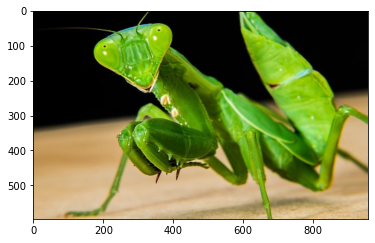

In [172]:
imgplot = plt.imshow(img)
#Per treure els eixos de la visualització:
#plt.axis('off')

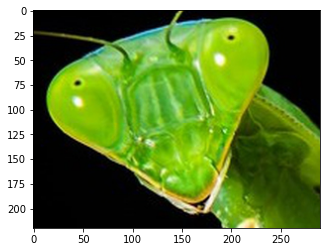

In [159]:
cara_mantis = img_copy[30:250, 160:450]
plt.imshow(cara_mantis)

In [ ]:
- Exercici 8

Mostreu-me a veure que passa quan eliminem el canal G Verd o B Blau. 
Hauries de utizar la indexacion per selecciones el canal que voleu anul·lar.

Utilitzar el mètode, mpimg.imsave () de la llibreria importada, 
per guardar les imatges modificades i que haureu de pujar al vostre repositori a github.

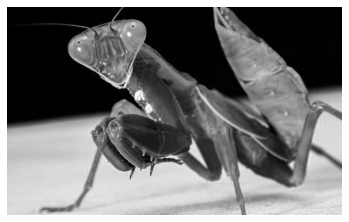

In [150]:
#Convertim l'array 3D en un 2D seleccionant només un de les tres dimensions:
plt.axis('off')
greyscale_mantis = img[:,:,0]
#Per tal que ens apliqui l'escala de grisos hem de treure el cmap que matplotlib aplica per default posant-ne un nosaltres:
plt.imshow(greyscale_mantis, cmap='gray')

In [175]:
#La imatge tenia drets i no em deixava modificar-la. Faig una copia i comprovo que 'WRITEABLE' = True.
#Si no fem copia i anem fent modificacions a la imatge es van acomulant.
img_copy = img.copy()
img_copy.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

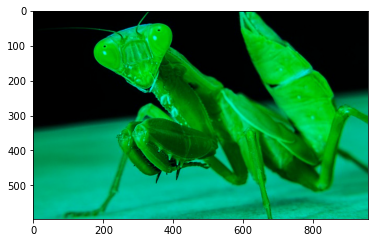

In [176]:
# assignem un dels canals RGB a 0 
#red = 0
#green = 1
#blue = 2
img_copy[:,:,0] = np.zeros([img_copy.shape[0], img_copy.shape[1]])
plt.imshow(img_copy)

In [15]:
img_2 = mpimg.imread('degradats.jpg')

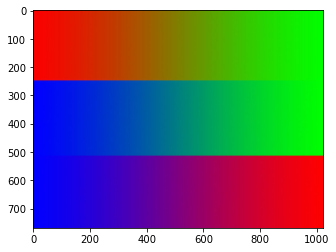

In [16]:
plt.imshow(img_2)

In [17]:
img2_copy = img_2.copy()

In [11]:
img2_copy.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

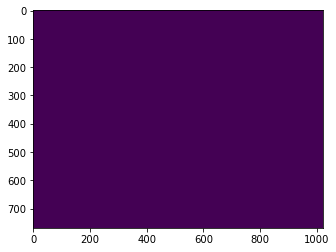

In [18]:
#Treiem el G channel de la copia de la imatge de degradats i ens queden només els canals R i B:
sin_verde = img2_copy[:,:,1] = np.zeros([img2_copy.shape[0], img2_copy.shape[1]],)
plt.imshow(sin_verde)

In [224]:
#Treiem el G channel de la copia de la imatge de degradats i ens queden només els canals R i B:
#np.zeros([img2_copy.shape[0]])
np.zeros([img2_copy.shape[0], img2_copy.shape[1]],)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [201]:
img_copy.shape

(596, 958, 3)

In [231]:
img2_copy.shape

(768, 1024, 3)

In [5]:
%who 

gc	 ma	 mpimg	 np	 plt	 


In [227]:
gc.enable()

In [228]:
gc.collect()

5448

In [19]:
guardar = mpimg.imsave(r'\Users\ab\Itacademy\Jupyter\degradats.jpg', sin_verde)
guardar